<a href="https://colab.research.google.com/github/Samay-jain622/Predictive-Maintenance-with-Markov-Chains-and-Anomaly-Detection-using-Variational-Autoencoders/blob/main/Predictive_Maintenance_through_Markov_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter


In [ ]:
from zipfile import ZipFile

# Avoid using the name 'zip' as a variable
dataset = '/content/markov .zip'
with ZipFile(dataset, 'r') as zip_file:  # Renamed 'zip' to 'zip_file'
    zip_file.extractall()
    print('The dataset is extracted')

results = []

The dataset is extracted


In [ ]:
def process_file(input_file, output_file):
    try:
        data = pd.read_csv(input_file)
    except FileNotFoundError:
        print(f"Error: File not found at {input_file}")
        return

    df22 = data.copy()
    df22['A'] =  df22[['A_1', 'A_2', 'A_3', 'A_4', 'A_5']].mean(axis=1)
    df22['B'] =  df22[['B_1', 'B_2', 'B_3', 'B_4', 'B_5']].mean(axis=1)
    df22['C'] =  df22[['C_1', 'C_2', 'C_3', 'C_4', 'C_5']].mean(axis=1)
    df22['L1'] = df22[['L_1', 'L_2']].mean(axis=1)
    df22['L2'] = df22[['L_3', 'L_4']].mean(axis=1)
    df22['L3'] = df22[['L_5', 'L_6']].mean(axis=1)
    df22['L4'] = df22[['L_7', 'L_8']].mean(axis=1)
    df22['L5'] = df22[['L_9', 'L_10']].mean(axis=1)

    file_processed = df22[['Timestamp', 'A', 'B', 'C', 'L1', 'L2', 'L3', 'L4', 'L5']].copy()
    file_processed.to_csv(output_file, index=False)
    print(f"File saved successfully as {output_file}")

# Process other CSV files (replace with your actual file names)
process_file("/content/C16.csv", "file10.csv")
process_file("/content/C15.csv", "file9.csv")
process_file("/content/C14.csv", "file8.csv")
process_file("/content/C13-2.csv", "file7.csv")
process_file("/content/C13-1.csv", "file6.csv")
process_file("/content/C11.csv", "file5.csv")
process_file("/content/C9.csv", "file4.csv")
process_file("/content/C8.csv", "file3.csv")
process_file("/content/C7-2.csv", "file2.csv")
process_file("/content/C7-1.csv", "file1.csv")
# ... add more files as needed ...

File saved successfully as file10.csv
File saved successfully as file9.csv
File saved successfully as file8.csv
File saved successfully as file7.csv
File saved successfully as file6.csv
File saved successfully as file5.csv
File saved successfully as file4.csv
File saved successfully as file3.csv
File saved successfully as file2.csv
File saved successfully as file1.csv


In [ ]:
df1=pd.read_csv('/content/file1.csv')
df2=pd.read_csv('/content/file2.csv')
df3=pd.read_csv('/content/file3.csv')
df4=pd.read_csv('/content/file4.csv')
df5=pd.read_csv('/content/file5.csv')
df6=pd.read_csv('/content/file6.csv')
df7=pd.read_csv('/content/file7.csv')
df8=pd.read_csv('/content/file8.csv')

In [ ]:
df1

,Timestamp,A,B,C,L1,L2,L3,L4,L5
0,0,-69.421543,-71.309296,-69.473538,-89.531696,-98.444264,-80.622617,-59.524673,-81.516976
1,1,-69.832981,-71.554045,-69.451501,-89.531696,-98.444264,-80.622617,-59.524673,-81.516976
2,2,-69.086352,-72.102294,-69.451767,-83.743053,-98.293264,-78.046416,-58.649174,-84.324599
3,3,-69.037162,-72.084362,-69.459987,-74.303974,-94.608854,-70.931910,-49.370341,-79.267235
4,4,-69.755554,-72.362156,-69.476248,-58.651231,-83.714175,-65.023126,-37.931795,-67.441827
...,...,...,...,...,...,...,...,...,...
16968,16968,-47.593367,-52.576675,-50.186686,-72.628625,-96.359812,-77.245291,-64.919316,-85.514123
16969,16969,-47.715749,-52.296547,-50.786701,-72.889592,-96.359812,-77.245291,-67.254836,-85.514123
16970,16970,-48.604172,-51.929422,-50.508940,-71.528836,-96.359812,-64.896006,-66.626735,-80.008672
16971,16971,-47.386783,-51.456197,-50.576969,-89.417801,-97.862266,-74.032529,-30.103751,-84.605930


In [ ]:
def predict_next_states(initial_states,matrix,steps=1):
  current_distribution=np.array(initial_states)
  for i in range(steps):
    current_distribution=np.dot(current_distribution,matrix.values)
    return current_distribution

In [ ]:
# Assume files are named 'file1.csv', 'file2.csv', ..., 'file10.csv'
file_names = [f"file{i}.csv" for i in range(1, 11)]
dataframes = [pd.read_csv(file) for file in file_names]

print("Loaded all 10 files into dataframes.")

Loaded all 10 files into dataframes.


In [ ]:
# Compute mean values for each component using the first two files
component_means = {}
for component in dataframes[0].columns[1:]:
    combined_values = pd.concat([dataframes[0][component], dataframes[1][component]])
    component_means[component] = combined_values.mean()

# Compute standard deviation values for each component using the third file
component_stds = {}
for component in dataframes[2].columns[1:]:
    component_stds[component] = dataframes[2][component].std()

print("Computed means from the first two files and standard deviations from the third file.")


Computed means from the first two files and standard deviations from the third file.


In [ ]:

print("Reference Mean and Standard Deviation (used for actual state analysis):")
for component in component_means.keys():
    print(f"{component}: Mean = {component_means[component]:.2f}, Std Dev = {component_stds[component]:.2f}")

Reference Mean and Standard Deviation (used for actual state analysis):
A: Mean = 62.67, Std Dev = 26.21
B: Mean = 56.54, Std Dev = 21.43
C: Mean = 58.72, Std Dev = 22.54
L1: Mean = 36.45, Std Dev = 28.92
L2: Mean = -21.04, Std Dev = 21.35
L3: Mean = -51.32, Std Dev = 7.58
L4: Mean = 11.40, Std Dev = 21.50
L5: Mean = 13.24, Std Dev = 24.01


In [ ]:
def categorize_state(value, mean, std):
    """Categorize the state of a value based on mean and standard deviation."""
    if abs(value - mean) <= 0.75*std:
        return "Healthy"
    elif abs(value - mean) <= 1.75 * std:
        return "Degrading"
    elif abs(value - mean) <= 3 * std:
        return "Critical"
    else:
        return "Failed"

def compute_transition_matrix(states):
    """Compute the transition matrix for given states."""
    states = states.to_numpy()
    unique_states = ["Healthy", "Degrading", "Critical", "Failed"]
    n_states = len(unique_states)
    transition_matrix = np.zeros((n_states, n_states))

    for i in range(len(states) - 1):
        current_state = unique_states.index(states[i])
        next_state = unique_states.index(states[i + 1])
        transition_matrix[current_state, next_state] += 1

    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    transition_matrix = np.divide(transition_matrix, row_sums, where=row_sums != 0)
    return transition_matrix

def predict_next_states(initial_distribution, transition_matrix):
    """Predict the next state probabilities using the Markov chain."""
    return np.dot(initial_distribution, transition_matrix)

In [ ]:


results = []  # Store predicted vs actual results

# Start iterating from the third file onward
for i in range(2, len(dataframes)):
    current_file = dataframes[i]
    previous_file = dataframes[i - 1]

    file_results = {"file": file_names[i], "components": []}  # Store results for this file

    for component in current_file.columns[1:]:
        # Categorize states in the previous file using the fixed reference mean and standard deviation
        previous_states = previous_file[component].apply(
            lambda x: categorize_state(x, component_means[component], component_stds[component])
        )

        # Compute transition matrix
        transition_matrix = compute_transition_matrix(previous_states)

        # Predict states for the current file
        initial_state_dist = previous_states.value_counts(normalize=True).reindex(
            ["Healthy", "Degrading", "Critical", "Failed"], fill_value=0).values
        predicted_distribution = predict_next_states(initial_state_dist, transition_matrix)

        # Calculate actual probabilities for the current file using fixed mean and standard deviation
        actual_prob = current_file[component].apply(
            lambda x: categorize_state(x, component_means[component], component_stds[component])
        ).value_counts(normalize=True).reindex(["Healthy", "Degrading", "Critical", "Failed"], fill_value=0)

        # Create a dictionary for predicted probabilities manually without using zip
        predicted_probabilities = {
            "Healthy": predicted_distribution[0],
            "Degrading": predicted_distribution[1],
            "Critical": predicted_distribution[2],
            "Failed": predicted_distribution[3]
        }

        # Store component results
        component_results = {
            "component": component,
            "transition_matrix": transition_matrix.tolist(),
            "predicted_probabilities": predicted_probabilities,
            "actual_probabilities": actual_prob.to_dict()
        }
        file_results["components"].append(component_results)

    # Append results for this file
    results.append(file_results)

# Print summarized results
for file_result in results:
    print(f"File: {file_result['file']}")
    for component_result in file_result["components"]:
        print(f"  Component: {component_result['component']}")
        print("    Transition Matrix:")
        print("      Healthy   Degrading   Critical   Failed")
        # Print summarized results
for file_result in results:
    print(f"File: {file_result['file']}")
    for component_result in file_result["components"]:
        print(f"  Component: {component_result['component']}")
        print("    Transition Matrix:")
        print("      Healthy   Degrading   Critical   Failed")

        # Iterate manually over the states and the rows of the transition matrix
        states = ["Healthy", "Degrading", "Critical", "Failed"]
        for i in range(len(states)):
            print(f"      {states[i]}: {component_result['transition_matrix'][i]}")

        print("    Predicted Probabilities:", component_result["predicted_probabilities"])
        print("    Actual Probabilities:", component_result["actual_probabilities"])
        print()





File: file3.csv
  Component: A
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: B
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: C
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: L1
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: L2
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: L3
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: L4
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: L5
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
File: file4.csv
  Component: A
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: B
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: C
    Transition Matrix:
      Healthy   Degrading   Critical   Failed
  Component: L1
    Transition Matrix:


In [ ]:
pip install tabulate

In [ ]:
def calculate_efficiency(predicted_probs, actual_probs):
    """Calculate efficiency of predicted vs actual probabilities."""
    states = ["Healthy", "Degrading", "Critical", "Failed"]

    # Extract probabilities in the same order
    predicted = np.array([predicted_probs[state] for state in states])
    actual = np.array([actual_probs[state] for state in states])

    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(np.abs(predicted - actual))

    # Calculate percentage similarity score (0-100%)
    max_diff = 1.0  # Maximum possible difference for probabilities
    efficiency = (1 - mae / max_diff) * 100

    return mae, efficiency

# Calculate and display efficiencies for all files and components
efficiency_results = []

for file_result in results:
    file_name = file_result["file"]
    file_efficiencies = {"file": file_name, "components": []}

    for component_result in file_result["components"]:
        component = component_result["component"]
        predicted_probs = component_result["predicted_probabilities"]
        actual_probs = component_result["actual_probabilities"]

        # Calculate MAE and Efficiency
        mae, efficiency = calculate_efficiency(predicted_probs, actual_probs)

        # Store results
        file_efficiencies["components"].append({
            "component": component,
            "mae": mae,
            "efficiency": efficiency
        })

    efficiency_results.append(file_efficiencies)

# Display results
from tabulate import tabulate

for file_efficiency in efficiency_results:
    print(f"\n{'='*80}")
    print(f"File: {file_efficiency['file']}")
    print(f"{'='*80}")

    rows = []
    for component_eff in file_efficiency["components"]:
        rows.append([component_eff["component"], f"{component_eff['mae']:.4f}", f"{component_eff['efficiency']:.2f}%"])

    print(tabulate(rows, headers=["Component", "MAE", "Efficiency (%)"], tablefmt="fancy_grid"))


File: file3.csv
╒═════════════╤════════╤══════════════════╕
│ Component   │    MAE │ Efficiency (%)   │
╞═════════════╪════════╪══════════════════╡
│ A           │ 0.0046 │ 99.54%           │
├─────────────┼────────┼──────────────────┤
│ B           │ 0.0377 │ 96.23%           │
├─────────────┼────────┼──────────────────┤
│ C           │ 0.02   │ 98.00%           │
├─────────────┼────────┼──────────────────┤
│ L1          │ 0.0905 │ 90.95%           │
├─────────────┼────────┼──────────────────┤
│ L2          │ 0.0761 │ 92.39%           │
├─────────────┼────────┼──────────────────┤
│ L3          │ 0.0283 │ 97.17%           │
├─────────────┼────────┼──────────────────┤
│ L4          │ 0.0447 │ 95.53%           │
├─────────────┼────────┼──────────────────┤
│ L5          │ 0.0147 │ 98.53%           │
╘═════════════╧════════╧══════════════════╛

File: file4.csv
╒═════════════╤════════╤══════════════════╕
│ Component   │    MAE │ Efficiency (%)   │
╞═════════════╪════════╪══════════════════

In [ ]:
import matplotlib.pyplot as plt


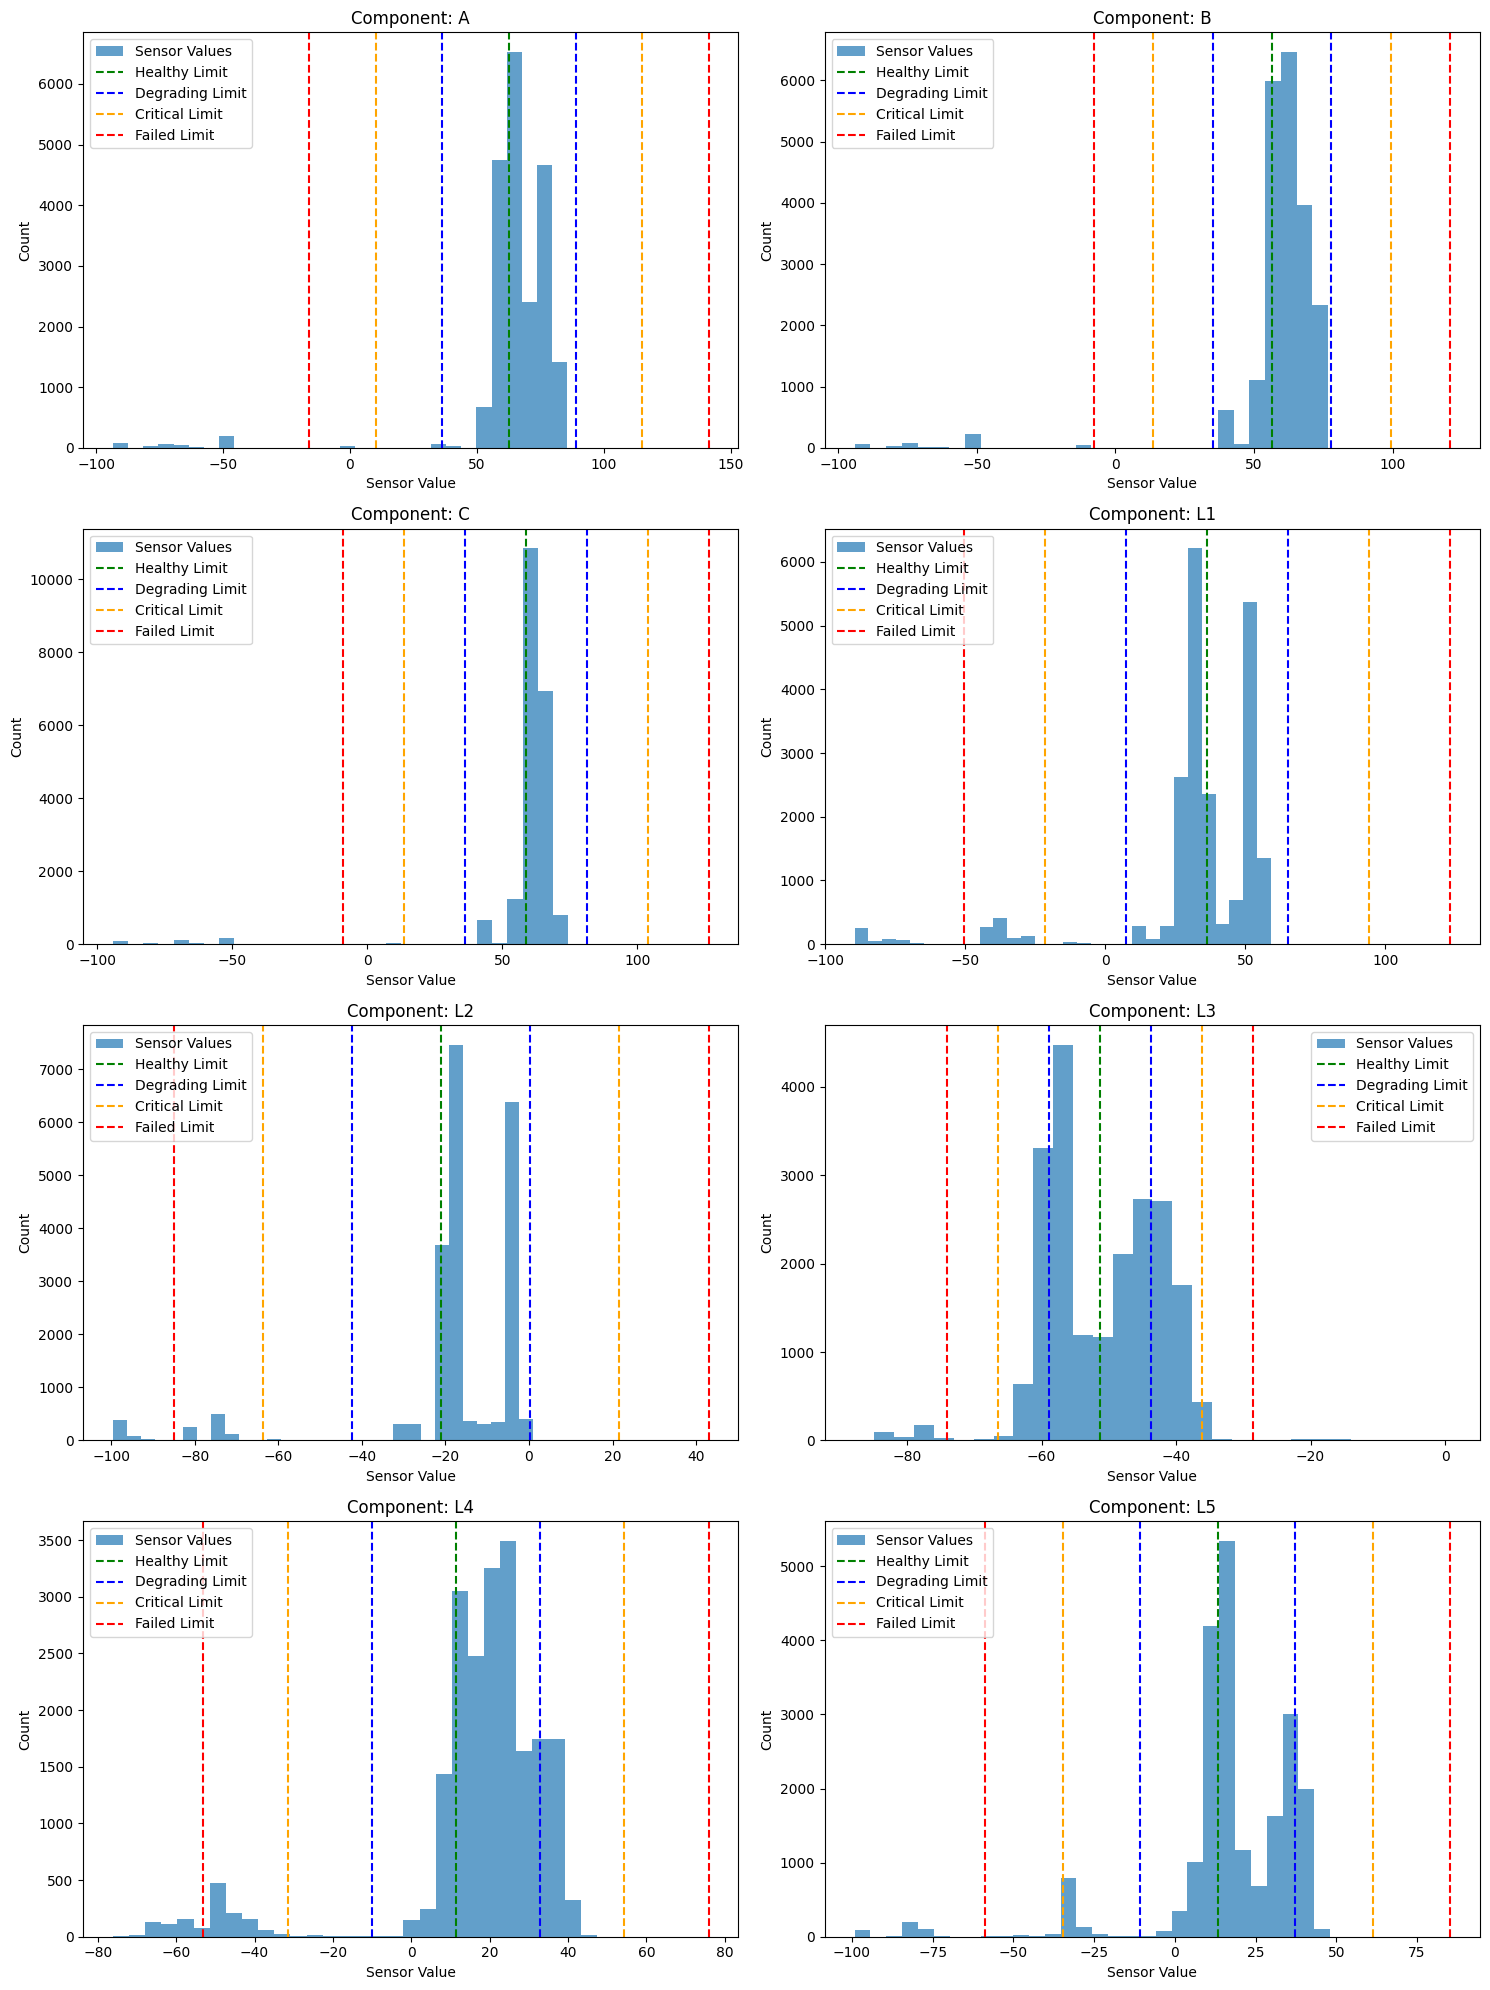

In [ ]:
file_10 = dataframes[9]

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, component in enumerate(file_10.columns[1:]):
    ax = axes[idx]

    # Histogram
    sensor_values = file_10[component]
    ax.hist(sensor_values, bins=30, alpha=0.7, label="Sensor Values")

    # Control limits using means from the first two files and std from the third file
    mean = component_means[component]
    std = component_stds[component]
    ax.axvline(mean, color='green', linestyle='--', label='Healthy Limit')
    ax.axvline(mean + std, color='blue', linestyle='--', label='Degrading Limit')
    ax.axvline(mean + 2 * std, color='orange', linestyle='--', label='Critical Limit')
    ax.axvline(mean + 3 * std, color='red', linestyle='--', label='Failed Limit')

    ax.axvline(mean - std, color='blue', linestyle='--')
    ax.axvline(mean - 2 * std, color='orange', linestyle='--')
    ax.axvline(mean - 3 * std, color='red', linestyle='--')

    ax.set_title(f"Component: {component}")
    ax.set_xlabel("Sensor Value")
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()